## Etapa 1
Realizar un análisis exploratorio inicial de los
DataFrames.

***Calidad de Datos:** Identificar valores nulos y duplicados en los conjuntos dedatos. Documentar el estado inicial de los datos.*


In [ ]:
 # ----------------------------------------------------
# Importamos módulos (Librerías basicas)
# ----------------------------------------------------
import pandas as pd
import numpy as np

# ----------------------------------------------------
# Cargamos los DataFrames
# ----------------------------------------------------

url_clientes = "https://drive.google.com/uc?id=1l63--JaUv1MzfEzS5R-CQwJOI69l6lPX"
url_marketing = "https://drive.google.com/uc?id=1ChMMpSJ5i9mQs61YjwK-S1V17ADi_hZ4"
url_ventas = "https://drive.google.com/uc?id=134bov6oAujLLQtxCjsdcFaQN1KhKmlXb"


ventas    = pd.read_csv(url_ventas)
clientes  = pd.read_csv(url_clientes)
marketing = pd.read_csv(url_marketing)

In [ ]:
import pandas as pd
import numpy as np

# ----------------------------------------------------
# Cargos los DataFrames
# ----------------------------------------------------
ventas    = pd.read_csv(url_ventas)
clientes  = pd.read_csv(url_clientes)
marketing = pd.read_csv(url_marketing)

def vista_rapida(df, mostrar_muestras=True):
    """
    Realiza un análisis exploratorio rápido de un DataFrame

    """
    print()
    print(f"📊 {df.name.upper()} :", df.shape)

    # Tipos de datos y nulos
    print("\n" + "="*50)
    print("🔍 TIPOS DE DATOS Y VALORES NULOS")
    print("="*50)

    info_df = pd.DataFrame({
        'Tipo': df.dtypes,
        'No Nulos': df.count(),
        'Nulos': df.isna().sum(),
        '% Nulos': (df.isna().sum() / len(df) * 100).round(2)
    })
    display(info_df)

    # Duplicados
    print("\n" + "-"*40)
    duplicados = df.duplicated().sum()
    print(f"🔍 DUPLICADOS: {duplicados} ({duplicados/len(df)*100:.2f}%)")
    print("-"*40)

    # Muestra de datos
    if mostrar_muestras:
        print("\n" + "="*50)
        print("📋 MUESTRA DE DATOS")
        print("="*50)
        display(df.head(3))

    # Resumen numérico
    print("\n" + "="*50)
    print("🔢 RESUMEN NUMÉRICO")
    print("="*50)
    numeric_cols = df.select_dtypes(include=["number", "bool"])
    if not numeric_cols.empty:
        display(numeric_cols.describe().T)
    else:
        print("No hay columnas numéricas")

    # Resumen categórico
    print("\n" + "="*50)
    print("📝 RESUMEN CATEGÓRICO")
    print("="*50)
    categorical_cols = df.select_dtypes(include=["object", "category"])
    if not categorical_cols.empty:
        # Información adicional para categóricas
        cat_info = []
        for col in categorical_cols.columns:
            unique_vals = categorical_cols[col].nunique()
            most_frequent = categorical_cols[col].mode().iloc[0] if not categorical_cols[col].empty else "N/A"
            cat_info.append({
                'Columna': col,
                'Valores Únicos': unique_vals,
                'Más Frecuente': most_frequent
            })
        display(pd.DataFrame(cat_info))
    else:
        print("No hay columnas categóricas")

    # Columnas con un solo valor
    print("\n" + "-"*40)
    print("🎯 COLUMNAS CON UN SOLO VALOR")
    print("-"*40)
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    if constant_cols:
        print(f"Columnas constantes: {constant_cols}")
    else:
        print("No hay columnas constantes")

# Configurar nombres de los DataFrames
ventas.name = "Ventas"
clientes.name = "Clientes"
marketing.name = "Marketing"

# Análisis de todos los DataFrames
dataframes = [ventas, clientes, marketing]

print("🚀 ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

for i, df in enumerate(dataframes, 1):
    print(f"\n{'#'*60}")
    print(f"📁 DATAFRAME {i}/{len(dataframes)}: {df.name}")
    print(f"{'#'*60}")
    vista_rapida(df)


🚀 ANÁLISIS EXPLORATORIO DE DATOS

############################################################
📁 DATAFRAME 1/3: Ventas
############################################################

📊 VENTAS : (3035, 6)

🔍 TIPOS DE DATOS Y VALORES NULOS


,Tipo,No Nulos,Nulos,% Nulos
id_venta,int64,3035,0,0.00
producto,object,3035,0,0.00
precio,object,3033,2,0.07
cantidad,float64,3033,2,0.07
fecha_venta,object,3035,0,0.00
categoria,object,3035,0,0.00



----------------------------------------
🔍 DUPLICADOS: 35 (1.15%)
----------------------------------------

📋 MUESTRA DE DATOS


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos



🔢 RESUMEN NUMÉRICO


,count,mean,std,min,25%,50%,75%,max
id_venta,3035.0,1499.851400,866.465379,1.0,748.5,1502.0,2249.5,3000.0
cantidad,3033.0,6.496538,3.457250,1.0,3.0,7.0,9.0,12.0



📝 RESUMEN CATEGÓRICO


,Columna,Valores Únicos,Más Frecuente
0,producto,30,Lámpara de mesa
1,precio,2590,$76.32
2,fecha_venta,364,06/04/2024
3,categoria,3,Decoración



----------------------------------------
🎯 COLUMNAS CON UN SOLO VALOR
----------------------------------------
No hay columnas constantes

############################################################
📁 DATAFRAME 2/3: Clientes
############################################################

📊 CLIENTES : (567, 5)

🔍 TIPOS DE DATOS Y VALORES NULOS


,Tipo,No Nulos,Nulos,% Nulos
id_cliente,int64,567,0,0.0
nombre,object,567,0,0.0
edad,int64,567,0,0.0
ciudad,object,567,0,0.0
ingresos,float64,567,0,0.0



----------------------------------------
🔍 DUPLICADOS: 0 (0.00%)
----------------------------------------

📋 MUESTRA DE DATOS


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85



🔢 RESUMEN NUMÉRICO


,count,mean,std,min,25%,50%,75%,max
id_cliente,567.0,284.000000,163.823075,1.00,142.50,284.00,425.5,567.00
edad,567.0,37.940035,10.202885,20.00,30.00,37.00,43.0,81.00
ingresos,567.0,34668.739012,12974.531446,170.29,26015.24,35066.83,42457.1,88053.01



📝 RESUMEN CATEGÓRICO


,Columna,Valores Únicos,Más Frecuente
0,nombre,567,Aarika Brehat
1,ciudad,12,Mar del Plata



----------------------------------------
🎯 COLUMNAS CON UN SOLO VALOR
----------------------------------------
No hay columnas constantes

############################################################
📁 DATAFRAME 3/3: Marketing
############################################################

📊 MARKETING : (90, 6)

🔍 TIPOS DE DATOS Y VALORES NULOS


,Tipo,No Nulos,Nulos,% Nulos
id_campanha,int64,90,0,0.0
producto,object,90,0,0.0
canal,object,90,0,0.0
costo,float64,90,0,0.0
fecha_inicio,object,90,0,0.0
fecha_fin,object,90,0,0.0



----------------------------------------
🔍 DUPLICADOS: 0 (0.00%)
----------------------------------------

📋 MUESTRA DE DATOS


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024



🔢 RESUMEN NUMÉRICO


,count,mean,std,min,25%,50%,75%,max
id_campanha,90.0,45.500000,26.124701,1.00,23.2500,45.5,67.7500,90.00
costo,90.0,4.928667,0.947750,2.95,4.3725,4.9,5.5625,7.39



📝 RESUMEN CATEGÓRICO


,Columna,Valores Únicos,Más Frecuente
0,producto,30,Adorno de pared
1,canal,3,Email
2,fecha_inicio,78,01/11/2024
3,fecha_fin,78,05/05/2024



----------------------------------------
🎯 COLUMNAS CON UN SOLO VALOR
----------------------------------------
No hay columnas constantes


## Etapa 2 - Actividad 1
***Limpieza de Datos:* Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados**

**Eliminamos los nulos críticos y duplicados


In [ ]:
prev_shape = ventas.shape
prev_nulos_precio   = ventas['precio'].isna().sum()
prev_nulos_cantidad = ventas['cantidad'].isna().sum()
prev_dup            = ventas.duplicated().sum()

print("-"*40)
print("Antes de limpiar")
print("-"*40)
print("shape:", prev_shape,
      "| nulos precio:", prev_nulos_precio,
      "| nulos cantidad:", prev_nulos_cantidad,
      "| duplicados:", prev_dup)

----------------------------------------
Antes de limpiar
----------------------------------------
shape: (3035, 6) | nulos precio: 2 | nulos cantidad: 2 | duplicados: 35


In [ ]:
if 'precio' in ventas.columns:
    ventas['precio'] = (ventas['precio']
                        .astype(str)
                        .str.replace(r'[$,\s]', '', regex=True)
                        .replace({'nan': np.nan}))   # respeta nulos reales
    ventas['precio'] = pd.to_numeric(ventas['precio'], errors='coerce')

In [ ]:
if 'fecha_venta' in ventas.columns:
    ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'], dayfirst=True)

if 'fecha_inicio' in marketing.columns:
    marketing['fecha_inicio'] = pd.to_datetime(marketing['fecha_inicio'], dayfirst=True ,errors='coerce')

if 'fecha_fin' in marketing.columns:
    marketing['fecha_fin'] = pd.to_datetime(marketing['fecha_fin'], dayfirst=True,errors='coerce')

In [ ]:
# ----------------------------------------------------
#  Eliminar filas con nulos críticos en "ventas"
#    (columnas "precio" y "cantidad")
# ----------------------------------------------------
original_rows = ventas.shape[0]

ventas.dropna(subset=['precio', 'cantidad'], inplace=True)

eliminados_nulos = original_rows - ventas.shape[0]
print(f"Filas eliminadas con nulos en 'precio' y 'cantidad': {eliminados_nulos}")

Filas eliminadas con nulos en 'precio' y 'cantidad': 2


In [ ]:
# ----------------------------------------------------
#  Eliminar duplicados exactos en ventas
# ----------------------------------------------------

original_rows = ventas.shape[0]

ventas.drop_duplicates(inplace=True)

duplicados_eliminados = original_rows - ventas.shape[0]
print(f"Filas duplicadas eliminadas: {duplicados_eliminados}")
#

Filas duplicadas eliminadas: 35


In [ ]:
# ----------------------------------------------------
#  Crear importe
# ----------------------------------------------------
ventas['importe'] = ventas['precio'] * ventas['cantidad']

In [ ]:
# ----------------------------------------------------
#  Reporte post-limpieza
# ----------------------------------------------------
print("-"*40)
print("Después de limpiar")
print("-"*40)
print("shape:", ventas.shape)
print("Filas eliminadas por nulos críticos (precio/cantidad):", eliminados_nulos)
print("Duplicados eliminados:", duplicados_eliminados)

----------------------------------------
Después de limpiar
----------------------------------------
shape: (2998, 7)
Filas eliminadas por nulos críticos (precio/cantidad): 2
Duplicados eliminados: 35


In [ ]:
# ----------------------------------------------------
#    Chequeo rápido
# ----------------------------------------------------
print("-"*40)
print("Chequeo rápido (post):")
print("-"*40)
print("nulos importe:", ventas['importe'].isna().sum())
print("rango fechas ventas:", ventas['fecha_venta'].min(), "a", ventas['fecha_venta'].max())

# Vista mínima
print()
display(ventas.head(3))

----------------------------------------
Chequeo rápido (post):
----------------------------------------
nulos importe: 0
rango fechas ventas: 2024-01-02 00:00:00 a 2024-12-30 00:00:00



,id_venta,producto,precio,cantidad,fecha_venta,categoria,importe
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,293.88


In [ ]:
MESES_NOMBRE = {
    1:"Enero", 2:"Febrero", 3:"Marzo", 4:"Abril",
    5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto",
    9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"
}

totales = {}


filas_procesadas = 0
filas_omitidas = 0

if not {"fecha_venta", "importe"}.issubset(ventas.columns):
    print()
    print("-"*40)
    print("ERROR: Faltan columnas requeridas")
    print("-"*40)


ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'], dayfirst=True, errors='coerce')

ventas['year'] = ventas['fecha_venta'].dt.year
ventas['month'] = ventas['fecha_venta'].dt.month

ventas_totales = ventas.groupby(['year', 'month'])['importe'].sum()


print("-"*40)
print("Ventas mensuales")
print("-"*40)

for (year, month), total_sale in ventas_totales.items():
    date_str = f"{int(year)}-{int(month):02d}"

    month_name = MESES_NOMBRE.get(int(month), "Desconocido")

    sale_str = f"$ {total_sale:.2f}"

    print(f"{date_str} ({month_name}): {sale_str}")

----------------------------------------
Ventas mensuales
----------------------------------------
2024-01 (Enero): $ 129604.99
2024-02 (Febrero): $ 118672.44
2024-03 (Marzo): $ 136779.15
2024-04 (Abril): $ 128430.69
2024-05 (Mayo): $ 143727.25
2024-06 (Junio): $ 108480.17
2024-07 (Julio): $ 116229.97
2024-08 (Agosto): $ 119680.15
2024-09 (Septiembre): $ 115787.85
2024-10 (Octubre): $ 112117.13
2024-11 (Noviembre): $ 119951.79
2024-12 (Diciembre): $ 117631.94


## Etapa 1 - Actividad 3

***Estructuras de Datos:** Desarrollar un programa que almacene los datos de
ventas (producto, precio, cantidad).*



***Solución creando una lista registro de diccionarios por productos unicos sumando todas las ventas independiente del precio:**

In [ ]:
# Crear lista registro con productos únicos
registro = []

productos_unicos = ventas['producto'].unique()


print(f"🔄 Procesando {len(productos_unicos)} productos únicos...")

for producto in productos_unicos:
    # Filtrar datos del producto
    datos_producto = ventas[ventas['producto'] == producto]

    if datos_producto['precio'].isna().any() or datos_producto['cantidad'].isna().any() or pd.isna(producto):
          continue

    # Crear diccionario con conversión a tipos Python
    producto_dict = {
        'producto': str(producto),
        'precio': float(datos_producto['precio'].iloc[0]),
        'cantidad': int(datos_producto['cantidad'].sum())
    }

    registro.append(producto_dict)

print("-"*40)
print(f"✅ Lista 'registro' creada con {len(registro)} productos")
print("-"*40)

display(registro)

🔄 Procesando 30 productos únicos...
----------------------------------------
✅ Lista 'registro' creada con 30 productos
----------------------------------------


[{'producto': 'Cuadro decorativo', 'precio': 69.94, 'cantidad': 726},
 {'producto': 'Lámpara de mesa', 'precio': 105.1, 'cantidad': 1112},
 {'producto': 'Secadora', 'precio': 97.96, 'cantidad': 696},
 {'producto': 'Heladera', 'precio': 114.35, 'cantidad': 330},
 {'producto': 'Horno eléctrico', 'precio': 35.35, 'cantidad': 633},
 {'producto': 'Plancha de vapor', 'precio': 65.43, 'cantidad': 632},
 {'producto': 'Proyector', 'precio': 88.17, 'cantidad': 626},
 {'producto': 'Rincón de plantas', 'precio': 79.86, 'cantidad': 691},
 {'producto': 'Candelabro', 'precio': 66.11, 'cantidad': 160},
 {'producto': 'Aspiradora', 'precio': 95.9, 'cantidad': 651},
 {'producto': 'Freidora eléctrica', 'precio': 111.18, 'cantidad': 630},
 {'producto': 'Tablet', 'precio': 67.97, 'cantidad': 374},
 {'producto': 'Cortinas', 'precio': 62.1, 'cantidad': 610},
 {'producto': 'Adorno de pared', 'precio': 71.99, 'cantidad': 633},
 {'producto': 'Jarrón decorativo', 'precio': 96.97, 'cantidad': 672},
 {'producto': '

***Solución creando una lista registro de diccionarios por productos unicos separando los productos unicos con diferentes precios:**

In [ ]:
# Crear lista registro con productos únicos
registro = []

grupo_productos = ventas.groupby(['producto', 'precio']).agg({
    'cantidad': 'sum'
}).reset_index()

print(f"🔄 Procesando {len(grupo_productos)} combinaciones únicas de producto-precio...")

for _, fila in grupo_productos.iterrows():
    producto = fila['producto']
    precio = fila['precio']
    cantidad = fila['cantidad']

    # Verificar valores nulos
    if pd.isna(producto) or pd.isna(precio) or pd.isna(cantidad):
        continue

    producto_dict = {
        'producto': str(producto),
        'precio': float(precio),
        'cantidad': int(cantidad)
    }

    registro.append(producto_dict)

print("-"*40)
print(f"✅ Lista 'registro' creada con {len(registro)} productos")
print("-"*40)

display(registro)

🔄 Procesando 2983 combinaciones únicas de producto-precio...
----------------------------------------
✅ Lista 'registro' creada con 2983 productos
----------------------------------------


[{'producto': 'Adorno de pared', 'precio': 27.89, 'cantidad': 8},
 {'producto': 'Adorno de pared', 'precio': 27.92, 'cantidad': 5},
 {'producto': 'Adorno de pared', 'precio': 29.81, 'cantidad': 9},
 {'producto': 'Adorno de pared', 'precio': 30.18, 'cantidad': 8},
 {'producto': 'Adorno de pared', 'precio': 32.58, 'cantidad': 9},
 {'producto': 'Adorno de pared', 'precio': 33.01, 'cantidad': 1},
 {'producto': 'Adorno de pared', 'precio': 33.1, 'cantidad': 1},
 {'producto': 'Adorno de pared', 'precio': 33.27, 'cantidad': 12},
 {'producto': 'Adorno de pared', 'precio': 34.68, 'cantidad': 5},
 {'producto': 'Adorno de pared', 'precio': 36.04, 'cantidad': 11},
 {'producto': 'Adorno de pared', 'precio': 36.08, 'cantidad': 10},
 {'producto': 'Adorno de pared', 'precio': 36.55, 'cantidad': 3},
 {'producto': 'Adorno de pared', 'precio': 37.38, 'cantidad': 6},
 {'producto': 'Adorno de pared', 'precio': 37.5, 'cantidad': 3},
 {'producto': 'Adorno de pared', 'precio': 39.6, 'cantidad': 8},
 {'product

## Etapa 2 - Actividad 2

***Transformación de Datos:** Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.*

**Tomaremos los productos con mayores ingresos en su lugar**


Los top 10 productos que más dinero generaron (`ingresos_totales = suma de importe`).



In [ ]:
TOPX_productos = 10

# Calcular ingresos totales por producto
ingresos_por_producto = ventas.groupby('producto')['importe'].sum().reset_index()

# Ordenar por ingresos totales en orden descendente
ingresos_por_producto_ordenado = ingresos_por_producto.sort_values(by='importe', ascending=False)

# Obtener los top 10 productos
top_10_productos_ingresos = ingresos_por_producto_ordenado.head(TOPX_productos)

print("-"*40)
print(f"Top {TOPX_productos} productos por ingresos totales:")
print("-"*40)
display(top_10_productos_ingresos)

----------------------------------------
Top 10 productos por ingresos totales:
----------------------------------------


,producto,importe
19,Lámpara de mesa,82276.38
3,Auriculares,74175.58
20,Microondas,72562.89
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
27,Smartphone,54132.44
25,Secadora,52115.45
16,Jarrón decorativo,51130.88
4,Batidora,50979.20
24,Rincón de plantas,50456.45


## Etapa 2 - Actividad 3:

***Agregación:** Resumir las ventas por categoría de producto y analizar los
ingresos generados.*

Se genera una tabla que muestra el % de participación de cada tipo de producto sobre el total y el precio promedio de los productos por transacción

In [ ]:
# ----------------------------------------------------
# 1) Agrupar y resumir por categoría
# ----------------------------------------------------

resumen_cat_pivot = pd.pivot_table(
    ventas,
    index='categoria',
    values=['importe', 'cantidad', 'id_venta'],
    aggfunc={'importe': 'sum',
             'cantidad': 'sum',
             'id_venta': 'count'}
).rename(columns={'importe': 'ingresos',
                  'cantidad': 'unidades',
                  'id_venta': 'transacciones'}).sort_values('ingresos', ascending=False).reset_index()

# ----------------------------------------------------
# 2) Participación Promedio sobre el total
# ----------------------------------------------------

total_ingresos = resumen_cat_pivot['ingresos'].sum()
resumen_cat_pivot['participacion_%'] = (resumen_cat_pivot['ingresos'] / total_ingresos * 100).round(2)

# ----------------------------------------------------
# 3) Ticket promedio por transacción
# ----------------------------------------------------
resumen_cat_pivot['ticket_promedio'] = (resumen_cat_pivot['ingresos'] / resumen_cat_pivot['transacciones']).round(2)

print("-"*40)
print("Resumen por categoría:")
print("-"*40)
display(resumen_cat_pivot)

----------------------------------------
Resumen por categoría:
----------------------------------------


,categoria,unidades,transacciones,ingresos,participacion_%,ticket_promedio
0,Electrodomésticos,6592.0,1000,505299.63,34.44,505.30
1,Electrónica,6413.0,998,482577.80,32.89,483.54
2,Decoración,6490.0,1000,479216.09,32.66,479.22


## Etapa 2 - Actividad 4:

***Integración de Datos***: Combinar los sets de datos de ventas y marketing
para obtener una visión más amplia de las tendencias.

Se buscará averiguar cuál método de marketing resulta mas efectivo

In [ ]:
ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'], dayfirst=True)
marketing['fecha_inicio'] = pd.to_datetime(marketing['fecha_inicio'], dayfirst=True, errors='coerce')
marketing['fecha_fin'] = pd.to_datetime(marketing['fecha_fin'], dayfirst=True, errors='coerce')

In [ ]:
merged_df = pd.merge(ventas, marketing, on='producto', how='left')
print("-"*100)
print("Ventas y Marketing Mergeados:")
print("-"*100)
display(merged_df.head())

----------------------------------------------------------------------------------------------------
Ventas y Marketing Mergeados:
----------------------------------------------------------------------------------------------------


,id_venta,producto,precio,cantidad,fecha_venta,categoria,importe,year,month,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.7,2024,1,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.7,2024,1,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.7,2024,1,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.5,2024,1,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.5,2024,1,2,RRSS,5.88,2024-05-30,2024-06-29


In [ ]:
print(merged_df.columns)

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'importe', 'year', 'month', 'id_campanha', 'canal',
       'costo', 'fecha_inicio', 'fecha_fin'],
      dtype='object')


In [ ]:
ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'], dayfirst=True)
marketing['fecha_inicio'] = pd.to_datetime(marketing['fecha_inicio'], dayfirst=True, errors='coerce')
marketing['fecha_fin'] = pd.to_datetime(marketing['fecha_fin'], dayfirst=True, errors='coerce')

In [ ]:
## Ventas acumuladas por rango de fechas de campaña

filtered_sales = merged_df[
    (merged_df['fecha_venta'] >= merged_df['fecha_inicio']) &
    (merged_df['fecha_venta'] <= merged_df['fecha_fin'])
]

print("-"*100)
print("Ventas Filtradas por Fechas de Campaña:")
print("-"*100)
display(filtered_sales.head())

----------------------------------------------------------------------------------------------------
Ventas Filtradas por Fechas de Campaña:
----------------------------------------------------------------------------------------------------


,id_venta,producto,precio,cantidad,fecha_venta,categoria,importe,year,month,id_campanha,canal,costo,fecha_inicio,fecha_fin
2073,950,Adorno de pared,116.42,6.0,2024-03-20,Decoración,698.52,2024,3,74,TV,4.81,2024-03-20,2024-05-03
2091,780,Adorno de pared,79.13,7.0,2024-03-21,Decoración,553.91,2024,3,74,TV,4.81,2024-03-20,2024-05-03
2124,270,Adorno de pared,96.59,6.0,2024-03-22,Decoración,579.54,2024,3,74,TV,4.81,2024-03-20,2024-05-03
2160,210,Adorno de pared,71.67,4.0,2024-03-24,Decoración,286.68,2024,3,74,TV,4.81,2024-03-20,2024-05-03
2256,730,Adorno de pared,103.90,8.0,2024-03-28,Decoración,831.20,2024,3,74,TV,4.81,2024-03-20,2024-05-03


In [ ]:
# Cantidad de ventas(transacciones) logradas en un periodo de campaña
campaign_sales_count = filtered_sales.groupby('id_campanha').size().reset_index(name='ventas_individuales')

# Ventas totales(ganancia) en ese mismo periodo
campaign_sales_import = filtered_sales.groupby('id_campanha')['importe'].sum().reset_index(name='importe_total')

# Fusionar marketing con el conteo de ventas por campaña
marketing_with_sales_count = pd.merge(marketing, campaign_sales_count, on='id_campanha', how='left').fillna(0)

# Fusionar el resultado con el importe total de ventas por campaña
marketing_with_sales = pd.merge(marketing_with_sales_count, campaign_sales_import, on='id_campanha', how='left').fillna(0)

# Convertir la columna ventas_individuales a tipo entero
marketing_with_sales['ventas_individuales'] = marketing_with_sales['ventas_individuales'].astype(int)


print("-"*100)
print("Datos de Marketing con Conteo de Ventas Individuales e Importe Total:")
print("-"*100)
display(marketing_with_sales.head())

----------------------------------------------------------------------------------------------------
Datos de Marketing con Conteo de Ventas Individuales e Importe Total:
----------------------------------------------------------------------------------------------------


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,ventas_individuales,importe_total
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,14,6724.52
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13,9,3768.31
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20,18,6390.54
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16,16,8965.03
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05,14,6072.51


In [ ]:
# Averiguamos la cantidad de ventas logradas en un periodo de marketing según el canal de marketing

marketing_by_channel = marketing_with_sales.groupby('canal')

In [ ]:
channel_performance = marketing_by_channel[['ventas_individuales', 'importe_total']].sum()
print("-"*100)
print("Ventas Agregadas y Metricas de Ganancias por canal de marketing:")
print("-"*100)
display(channel_performance)

----------------------------------------------------------------------------------------------------
Ventas Agregadas y Metricas de Ganancias por canal de marketing:
----------------------------------------------------------------------------------------------------


,ventas_individuales,importe_total
canal,,
Email,307,152161.04
RRSS,264,125449.52
TV,276,139197.11


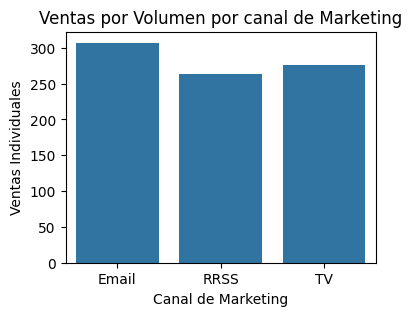

----------------------------------------------------------------------------------------------------


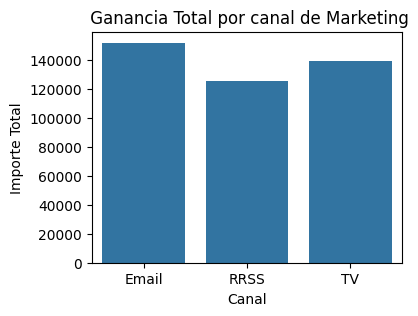

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ventas por Volumen
plt.figure(figsize=(4, 3))
sns.barplot(x=channel_performance.index, y='ventas_individuales', data=channel_performance)
plt.title('Ventas por Volumen por canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Ventas Individuales')
plt.show()
print("-"*100)

# Ventas por Ganancia
plt.figure(figsize=(4, 3))
sns.barplot(x=channel_performance.index, y='importe_total', data=channel_performance)
plt.title(' Ganancia Total por canal de Marketing')
plt.xlabel('Canal')
plt.ylabel('Importe Total')
plt.show()

## Etapa 3: Análisis de Datos

Objetivo: Realizar análisis estadísticos y exploratorios sobre los datos procesados.
Actividades:
1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión
sobre las ventas. Presentar los resultados en un informe.
2. Análisis Exploratorio de Datos (EDA): Realizar un análisis
exploratorio utilizando visualizaciones para identificar patrones y tendencias
en las ventas.
3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo,
precio y cantidad vendida) y mostrar los resultados en un gráfico.
4. Consolidación de Datos: Consolidar todos los análisis previos y preparar un
conjunto de datos final que resuma los hallazgos clave para la presentación.

In [ ]:
print("-"*100)
display(ventas.head(2))
print("-"*100)
display(marketing.head(2))
print("-"*100)

----------------------------------------------------------------------------------------------------


,id_venta,producto,precio,cantidad,fecha_venta,categoria,importe,year,month
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.7,2024,1
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.5,2024,1


----------------------------------------------------------------------------------------------------


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13


----------------------------------------------------------------------------------------------------


In [ ]:
# ----------------------------------------------------
# Agregación global por producto (VENTAS)
# ----------------------------------------------------
ventas_prod = (ventas
               .groupby('producto', as_index=False)
               .agg(ventas_total=('importe', 'sum'),
                    unidades_vendidas=('cantidad', 'sum')))

ventas_prod = ventas_prod.sort_values('ventas_total', ascending=False, ignore_index=True)
ventas_prod.head()


,producto,ventas_total,unidades_vendidas
0,Lámpara de mesa,82276.38,1112.0
1,Auriculares,74175.58,958.0
2,Microondas,72562.89,912.0
3,Cafetera,59607.31,765.0
4,Cuadro decorativo,54297.60,726.0


In [ ]:
# ----------------------------------------------------
# Agregación global por producto (MARKETING)
# ----------------------------------------------------
mkt_prod = (marketing
            .groupby('producto', as_index=False)
            .agg(inversion_total=('costo', 'sum'),
                 campañas=('id_campanha', 'count')))

mkt_prod = mkt_prod.sort_values('inversion_total', ascending=False, ignore_index=True)
mkt_prod.head()

,producto,inversion_total,campañas
0,Cafetera,18.16,3
1,Alfombra,17.46,3
2,Cortinas,17.36,3
3,Elementos de cerámica,16.87,3
4,Aspiradora,16.46,3


In [ ]:
# ----------------------------------------------------
# merge por producto (outer)
# ----------------------------------------------------
prod_global = (ventas_prod
               .merge(mkt_prod, on='producto', how='outer'))

# Acomodamos posibles NaN cuando un producto existe solo en una de las fuentes
# guardando un cero en esas posiciones.
for col in ['ventas_total', 'unidades_vendidas', 'inversion_total', 'campañas']:
    if col in prod_global.columns:
        prod_global[col] = prod_global[col].fillna(0)

prod_global.head()

,producto,ventas_total,unidades_vendidas,inversion_total,campañas
0,Adorno de pared,48093.49,633.0,14.05,3
1,Alfombra,44773.06,615.0,17.46,3
2,Aspiradora,50085.86,651.0,16.46,3
3,Auriculares,74175.58,958.0,15.24,3
4,Batidora,50979.20,672.0,15.28,3


In [ ]:
import numpy as np

# ----------------------------------------------------
# Creaciopn de Indicadores Derivados
# ----------------------------------------------------

# Ticket medio: ventas_total / unidades_vendidas
prod_global['ticket_medio'] = np.where(
    prod_global['unidades_vendidas'] != 0,
    (prod_global['ventas_total'] / prod_global['unidades_vendidas']),
    0
).round(2)

# ROAS: ventas_total / inversion_total
prod_global['ROAS'] = np.where(
    prod_global['inversion_total'] != 0,
    (prod_global['ventas_total'] / prod_global['inversion_total']),
    0
).round(2)

# Orden: por ventas_total, descendente
prod_global = prod_global.sort_values(['ventas_total', 'inversion_total'], ascending=[False, False], ignore_index=True)
prod_global.tail(10)

,producto,ventas_total,unidades_vendidas,inversion_total,campañas,ticket_medio,ROAS
20,Laptop,46179.48,617.0,15.19,3,74.85,3040.12
21,Consola de videojuegos,46174.41,623.0,12.77,3,74.12,3615.85
22,Elementos de cerámica,45411.09,636.0,16.87,3,71.40,2691.83
23,Cámara digital,45217.96,638.0,16.40,3,70.87,2757.19
24,Plancha de vapor,45196.63,632.0,14.12,3,71.51,3200.89
25,Cortinas,44865.03,610.0,17.36,3,73.55,2584.39
26,Alfombra,44773.06,615.0,17.46,3,72.80,2564.32
27,Tablet,25856.57,374.0,12.72,3,69.14,2032.75
28,Heladera,25736.80,330.0,13.11,3,77.99,1963.14
29,Candelabro,11128.80,160.0,14.65,3,69.56,759.65


### 3.1 Estadistica descriptiva de las ventas

En esta seccion vamos a obtener medidas de tendencia central y dispersion

In [ ]:
print("-"*40)
print("Estadísticas Descriptivas de Importe de Ventas")
print("-"*40)

# Medidas de Tendencia Central
media_importe = ventas['importe'].mean()
mediana_importe = ventas['importe'].median()
moda_importe = ventas['importe'].mode()[0] # [0] para obtener el primer modo si hay varios

print(f"Media (promedio) de importe: $ {media_importe:.2f}")
print(f"Mediana de importe: $ {mediana_importe:.2f}")
print(f"Moda de importe: $ {moda_importe:.2f}")

print("\n" + "-"*40)
print("Medidas de Dispersión de Importe de Ventas")
print("-"*40)

# Medidas de Dispersión
rango_importe = ventas['importe'].max() - ventas['importe'].min()
desviacion_estandar_importe = ventas['importe'].std()
varianza_importe = ventas['importe'].var()

# Calcular Q1 y Q3 para el rango intercuartílico (IQR)
Q1 = ventas['importe'].quantile(0.25)
Q3 = ventas['importe'].quantile(0.75)
iqr_importe = Q3 - Q1

print(f"Rango de importe: $ {rango_importe:.2f}")
print(f"Desviación estándar de importe: $ {desviacion_estandar_importe:.2f}")
print(f"Varianza de importe: $ {varianza_importe:.2f}")
print(f"Rango Intercuartílico (IQR) de importe: $ {iqr_importe:.2f}")

# Otra forma rápida de ver un resumen estadístico:
print("\n" + "-"*40)
print("Resumen estadístico completo")
print("-"*40)
display(ventas['importe'].describe())

----------------------------------------
Estadísticas Descriptivas de Importe de Ventas
----------------------------------------
Media (promedio) de importe: $ 489.36
Mediana de importe: $ 418.06
Moda de importe: $ 345.33

----------------------------------------
Medidas de Dispersión de Importe de Ventas
----------------------------------------
Rango de importe: $ 1461.82
Desviación estándar de importe: $ 334.28
Varianza de importe: $ 111744.33
Rango Intercuartílico (IQR) de importe: $ 489.00

----------------------------------------
Resumen estadístico completo
----------------------------------------


,importe
count,2998.000000
mean,489.357412
std,334.281817
min,26.300000
25%,220.920000
50%,418.065000
75%,709.920000
max,1488.120000


In [ ]:
# Seleccionamos las columnas numéricas relevantes para las estadísticas descriptivas por producto
columnas_prod = ['ventas_total', 'unidades_vendidas', 'inversion_total', 'campañas', 'ticket_medio', 'ROAS']

print("\n" + "-"*40)
print("Estadísticas Descriptivas por Producto")
print("-"*40)

estadisticas_prod = prod_global[columnas_prod].describe()
display(estadisticas_prod)


----------------------------------------
Estadísticas Descriptivas por Producto
----------------------------------------


,ventas_total,unidades_vendidas,inversion_total,campañas,ticket_medio,ROAS
count,30.000000,30.000000,30.000000,30.0,30.000000,30.000000
mean,48903.117333,649.833333,14.786000,3.0,74.989667,3322.291333
std,13265.561715,169.020522,1.637158,0.0,3.042294,889.230993
min,11128.800000,160.000000,11.850000,3.0,69.140000,759.650000
25%,45601.920000,623.750000,13.417500,3.0,72.967500,3040.810000
50%,48140.245000,635.500000,14.620000,3.0,74.820000,3379.680000
75%,51092.960000,672.000000,15.910000,3.0,77.115000,3610.265000
max,82276.380000,1112.000000,18.160000,3.0,81.400000,5164.870000


In [ ]:
# Crear df_final como una copia de estadisticas_prod
df_final = estadisticas_prod.copy()

# Guardar df_final en un archivo CSV
df_final.to_csv('df_final.csv', index=True)

print("DataFrame 'df_final' creado y guardado como 'df_final.csv'")
print("Primeras filas de df_final:")
display(df_final.head())

DataFrame 'df_final' creado y guardado como 'df_final.csv'
Primeras filas de df_final:


,ventas_total,unidades_vendidas,inversion_total,campañas,ticket_medio,ROAS
count,30.000000,30.000000,30.000000,30.0,30.000000,30.000000
mean,48903.117333,649.833333,14.786000,3.0,74.989667,3322.291333
std,13265.561715,169.020522,1.637158,0.0,3.042294,889.230993
min,11128.800000,160.000000,11.850000,3.0,69.140000,759.650000
25%,45601.920000,623.750000,13.417500,3.0,72.967500,3040.810000


In [ ]:
import plotly.express as px

# Crear el gráfico de barras interactivo
fig_ventas_producto = px.bar(prod_global.sort_values('ventas_total', ascending=False),
             x='producto',
             y='ventas_total',
             title='Ventas Totales por Producto',
             labels={'producto': 'Producto', 'ventas_total': 'Ventas Totales ($)'},
             hover_data=['unidades_vendidas', 'inversion_total', 'ROAS'])

# Personalizar el diseño del gráfico si es necesario
fig_ventas_producto.update_layout(xaxis_title='Producto',
                  yaxis_title='Ventas Totales ($)')

# Mostrar el gráfico
fig_ventas_producto.show()

In [ ]:
import plotly.express as px

# Crear el gráfico de barras interactivo para Ticket Medio por Producto
fig_ticket_medio = px.bar(prod_global.sort_values('ticket_medio', ascending=False),
                          x='producto',
                          y='ticket_medio',
                          title='Ticket Medio por Producto',
                          labels={'producto': 'Producto', 'ticket_medio': 'Ticket Medio ($)'},
                          hover_data=['ventas_total', 'unidades_vendidas', 'inversion_total', 'ROAS'])

# Personalizar el diseño del gráfico si es necesario
fig_ticket_medio.update_layout(xaxis_title='Producto',
                               yaxis_title='Ticket Medio ($)')

# Mostrar el gráfico
fig_ticket_medio.show()

Podemos notar que la mayoria de los productos rondan los 55k en ventas con algunos Outliers como Lamparas de Mesa, Auriculares y Microondas siendo las mayores fuentes de ingresos y los Candelabros siendo una de las menores.



Podemos notar en el mismo gráfico de Ticket Medio que la variación del precio de los productos por unidad no es notable de producto a producto, siendo el más caro solo un 17% más caro que el más barato

In [ ]:
import plotly.express as px

# Crear el gráfico de barras interactivo para ROAS por Producto
fig_roas = px.bar(prod_global.sort_values('ROAS', ascending=False),
                    x='producto',
                    y='ROAS',
                    title='ROAS por Producto',
                    labels={'producto': 'Producto', 'ROAS': 'ROAS'},
                    hover_data=['ventas_total', 'unidades_vendidas', 'inversion_total', 'ticket_medio'])

# Personalizar el diseño del gráfico si es necesario
fig_roas.update_layout(xaxis_title='Producto',
                       yaxis_title='ROAS')

# Mostrar el gráfico
fig_roas.show()

El ROAS de los mismos productos más vendidos son los mayores, por lo cual conviene seguir invirtiendo en su publicidad, mientras que la publicidad en productos como candelabros deberia reducirse

### 3.2 Analisis exploratorio (EDA)

En este apartado exploramos los datos para detectar patrones y tendencias.

Analizamos primero las ventas por meses

In [ ]:
ventas['anio_mes'] = ventas['fecha_venta'].dt.to_period('M').astype(str)

# Agrupamos las ventas por mes
ventas_mes = (ventas
              .groupby('anio_mes', as_index=False)
              .agg(
                  ventas_totales=('importe', 'sum'),
                  unidades_totales=('cantidad', 'sum'),
                  cantidad_operaciones=('importe', 'count')
              ))

ventas_mes.head()

,anio_mes,ventas_totales,unidades_totales,cantidad_operaciones
0,2024-01,129604.99,1741.0,268
1,2024-02,118672.44,1607.0,248
2,2024-03,136779.15,1792.0,265
3,2024-04,128430.69,1715.0,275
4,2024-05,143727.25,1812.0,275


In [ ]:
import plotly.express as px

# Crear el gráfico lineal de ventas por mes
fig_ventas_mes = px.line(
    ventas_mes,
    x='anio_mes',
    y='ventas_totales',
    title='Ventas Totales por Mes',
    labels={'anio_mes': 'Año-Mes', 'ventas_totales': 'Ventas Totales ($)'},
    markers=True # Muestra marcadores en cada punto de datos
)

# Personalizar el diseño del gráfico
fig_ventas_mes.update_layout(
    xaxis_title='Mes',
    yaxis_title='Ventas Totales ($)',
    hovermode='x unified', # Mejora la interactividad del tooltip
    yaxis_range=[65000, None] # Establece el valor mínimo del eje Y en 65k para tener una mejor visualización
)

# Mostrar el gráfico
fig_ventas_mes.show()

Evidentemente la primera mitad del año es dodne suceden la mayoria de las ventas, particularmente en Marzo y Mayo, habiendo posteriormente en Junio una caida de mas de 25% de las ventas.

In [ ]:
print("-"*40)
print("Correlación entre Ventas Totales y ROAS")
print("-"*40)

# Asegurémonos de que las columnas existen y no tienen valores nulos que impidan el cálculo
correlation = prod_global[['ventas_total', 'ROAS']].corr().iloc[0, 1]

print(f"El coeficiente de correlación de Pearson entre 'ventas_total' y 'ROAS' es: {correlation:.2f}")

import plotly.express as px

fig_scatter = px.scatter(prod_global,
                         x='ventas_total',
                         y='ROAS',
                         hover_name='producto',
                         title='Diagrama de Dispersión: Ventas Totales vs ROAS',
                         labels={'ventas_total': 'Ventas Totales ($)', 'ROAS': 'ROAS'},
                         trendline='ols')

fig_scatter.show()

----------------------------------------
Correlación entre Ventas Totales y ROAS
----------------------------------------
El coeficiente de correlación de Pearson entre 'ventas_total' y 'ROAS' es: 0.92


Existe una relación fuerte entre el ROAS y las ventas_total (0,92) en promedio de todos los productos.

Siendo esta casi directametne proporcional para todos los productos.


### 3.3 Analisis de correlaciones

En este paso vamos a analizar la relacion lineal entre algunas variables numericas

In [ ]:
import plotly.express as px
import pandas as pd

# Seleccionar las columnas numéricas de interés de prod_global para el mapa de calor de correlación
# Excluimos 'producto' ya que es categórico y 'campañas' si es constante y no añade variabilidad
numerical_cols_for_corr = ['ventas_total', 'unidades_vendidas', 'inversion_total', 'ticket_medio', 'ROAS']
correlation_matrix = prod_global[numerical_cols_for_corr].corr()

print("-"*40)
print("Mapa de Calor de Correlación de Variables de Producto")
print("-"*40)

# Crear el mapa de calor interactivo de la matriz de correlación
fig_corr_heatmap = px.imshow(correlation_matrix,
                             text_auto=True, # Muestra los valores de correlación en las celdas
                             aspect="auto", # Ajusta el aspecto automáticamente
                             color_continuous_scale='RdBu', # Escala de color divergente para correlaciones
                             title='Mapa de Calor de Correlación entre Variables de Prod_Global')

# Personalizar el diseño del gráfico
fig_corr_heatmap.update_layout(
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis_nticks=len(numerical_cols_for_corr),
    yaxis_showgrid=False,
    margin = {'t': 20, 'b': 20, 'l': 20, 'r': 20} # Corregido: el margen debe ser un diccionario
)

# Mostrar el gráfico
fig_corr_heatmap.show()

----------------------------------------
Mapa de Calor de Correlación de Variables de Producto
----------------------------------------


Hay una baja relación entre la inversion_total y ventas_total. Poseen una correlación baja.
Lo cual puede implicar que hay un punto en la inversion que aumentarla ya no produce mayor efecto o que hubo una campaña inefectiva.


### 3.4 Consolidacion de datos

Para facilitar las visualizaciones y el analisis final, crearemos un dataframe 'df_final'
y lo guardaremos en un archivo CSV por si lo queremos reutilizar

In [ ]:
# Crear df_final como una copia de estadisticas_prod
df_final = prod_global.copy()

# Guardar df_final en un archivo CSV
df_final.to_csv('df_final.csv', index=True)

print("DataFrame 'df_final' creado y guardado como 'df_final.csv'")
print("Primeras filas de df_final:")
display(df_final.head())

DataFrame 'df_final' creado y guardado como 'df_final.csv'
Primeras filas de df_final:


,producto,ventas_total,unidades_vendidas,inversion_total,campañas,ticket_medio,ROAS
0,Lámpara de mesa,82276.38,1112.0,15.93,3,73.99,5164.87
1,Auriculares,74175.58,958.0,15.24,3,77.43,4867.16
2,Microondas,72562.89,912.0,14.19,3,79.56,5113.66
3,Cafetera,59607.31,765.0,18.16,3,77.92,3282.34
4,Cuadro decorativo,54297.60,726.0,15.85,3,74.79,3425.72


----
# ETAPA 4 - VISUALIZACION DE DATOS
----


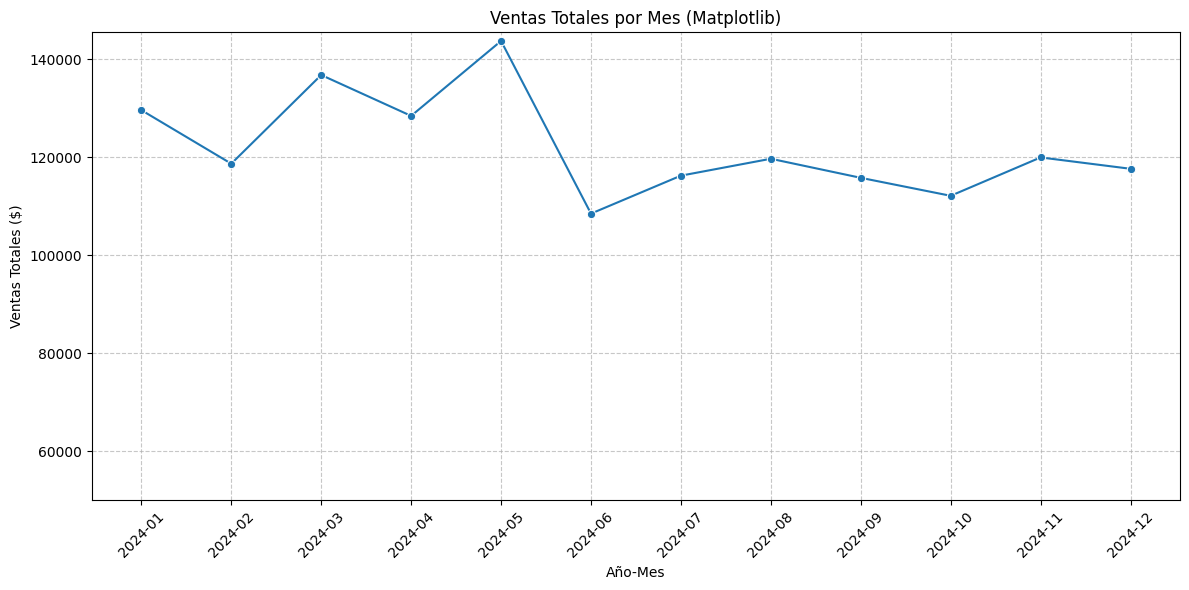

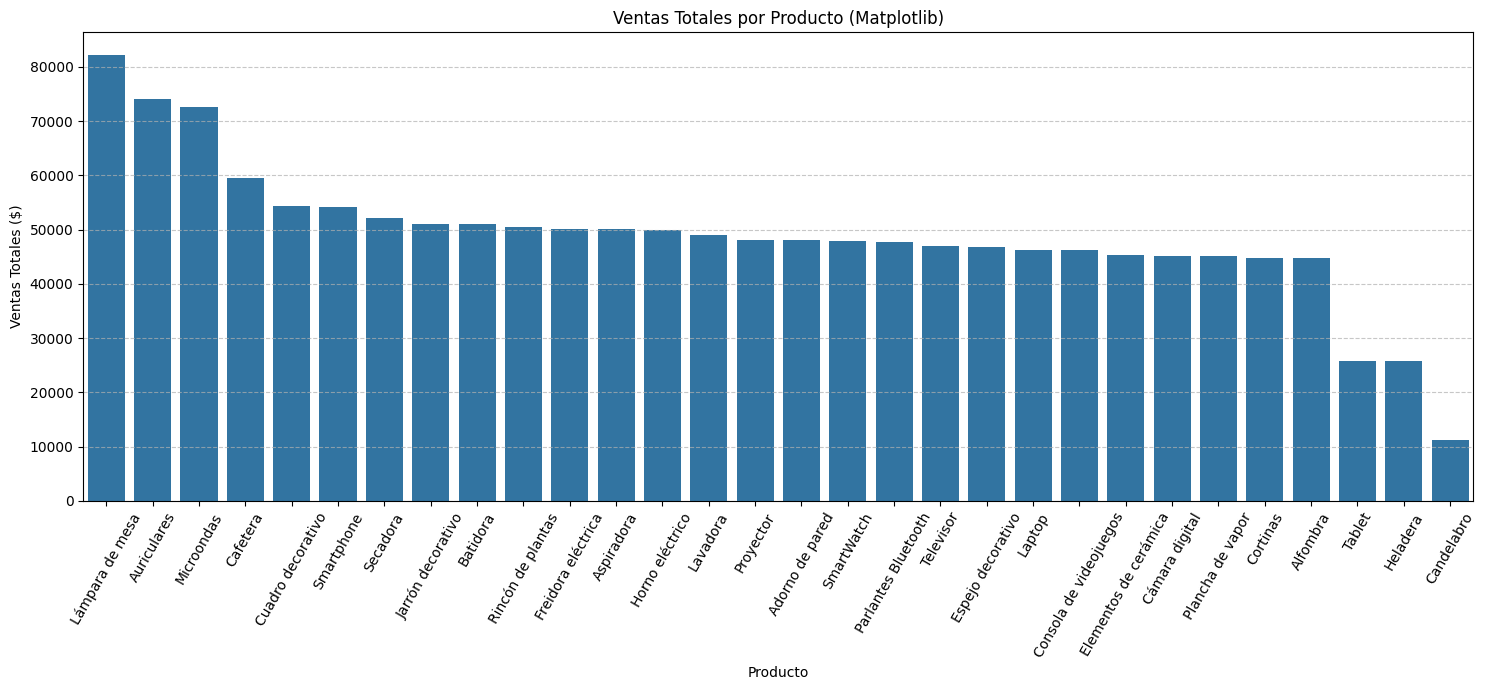

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Gráfico de Ventas Totales por Mes (fig_ventas_mes con Matplotlib) ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='anio_mes', y='ventas_totales', data=ventas_mes, marker='o')
plt.title('Ventas Totales por Mes (Matplotlib)')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas Totales ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(bottom=50000) # Ajustar el eje Y como se hizo en Plotly
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Gráfico de Ventas Totales por Producto (fig_ventas_producto con Matplotlib) ---

# Ordenar los productos por ventas totales para que el gráfico sea similar al de Plotly
prod_global_sorted = prod_global.sort_values('ventas_total', ascending=False)

plt.figure(figsize=(15, 7)) # Aumentar el tamaño para los muchos productos
sns.barplot(x='producto', y='ventas_total', data=prod_global_sorted)
plt.title('Ventas Totales por Producto (Matplotlib)')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=60) # Rotar etiquetas para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajusta automáticamente los parámetros de la trama para el diseño
plt.show()

In [ ]:
import plotly.express as px

fig_inversion_vs_ventas = px.scatter(prod_global,
                                     x='inversion_total',
                                     y='ventas_total',
                                     hover_name='producto',
                                     title='Inversión Total vs Ventas Totales por Producto',
                                     labels={'inversion_total': 'Inversión Total', 'ventas_total': 'Ventas Totales(Ganancia)'},
                                     )

fig_inversion_vs_ventas.show()

#Analizamos a los clientes por rango etario y origen


In [ ]:
# -----------------------------------------------------
# 1) Clientes por Edad
# -----------------------------------------------------
clientes_por_edad = clientes.groupby('edad').size().reset_index(name='cantidad_clientes')
print("----------------------------------------")
print("Cantidad de Clientes por Edad:")
print("----------------------------------------")
display(clientes_por_edad.head())

# -----------------------------------------------------
# 2) Clientes por Ciudad
# -----------------------------------------------------
clientes_por_ciudad = clientes.groupby('ciudad').size().reset_index(name='cantidad_clientes')
print("\n----------------------------------------")
print("Cantidad de Clientes por Ciudad:")
print("----------------------------------------")
display(clientes_por_ciudad.head())

----------------------------------------
Cantidad de Clientes por Edad:
----------------------------------------


,edad,cantidad_clientes
0,20,5
1,22,7
2,23,10
3,24,13
4,25,14



----------------------------------------
Cantidad de Clientes por Ciudad:
----------------------------------------


,ciudad,cantidad_clientes
0,Bahía Blanca,44
1,Buenos Aires,36
2,Corrientes,47
3,Córdoba,49
4,Mar del Plata,63


/tmp/ipython-input-3082053889.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




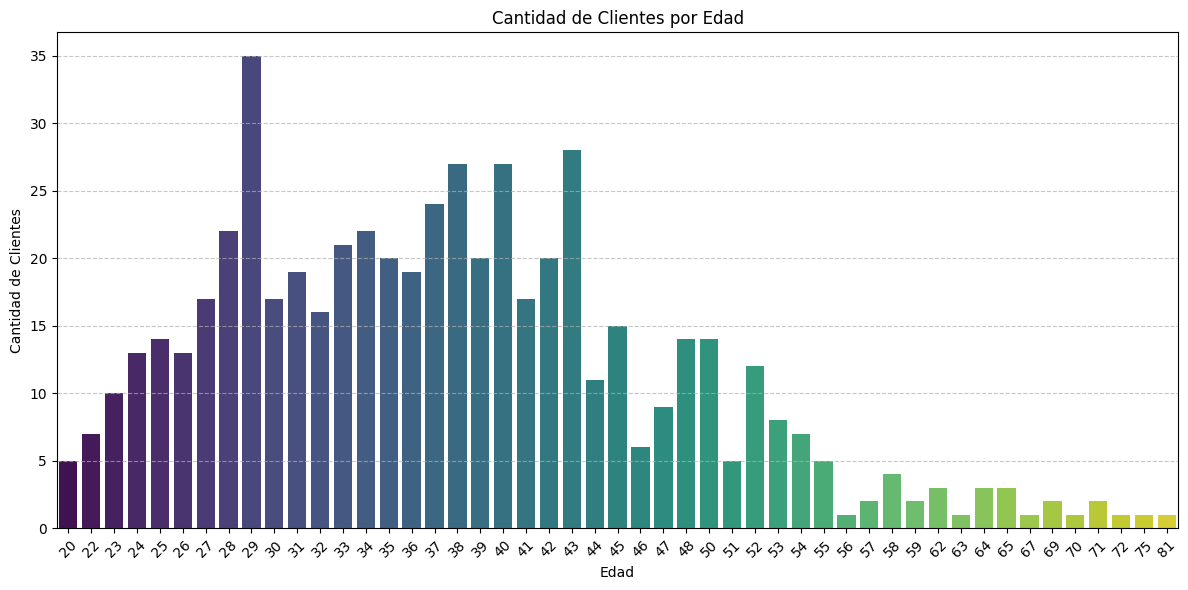

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Gráfico de Cantidad de Clientes por Edad ---
plt.figure(figsize=(12, 6))
sns.barplot(x='edad', y='cantidad_clientes', data=clientes_por_edad, palette='viridis', legend = 'False')
plt.title('Cantidad de Clientes por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45) # Rotar etiquetas para mejor legibilidad si hay muchas edades
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La mayor cantidad de ventas provienen de gente entre 28-43 años

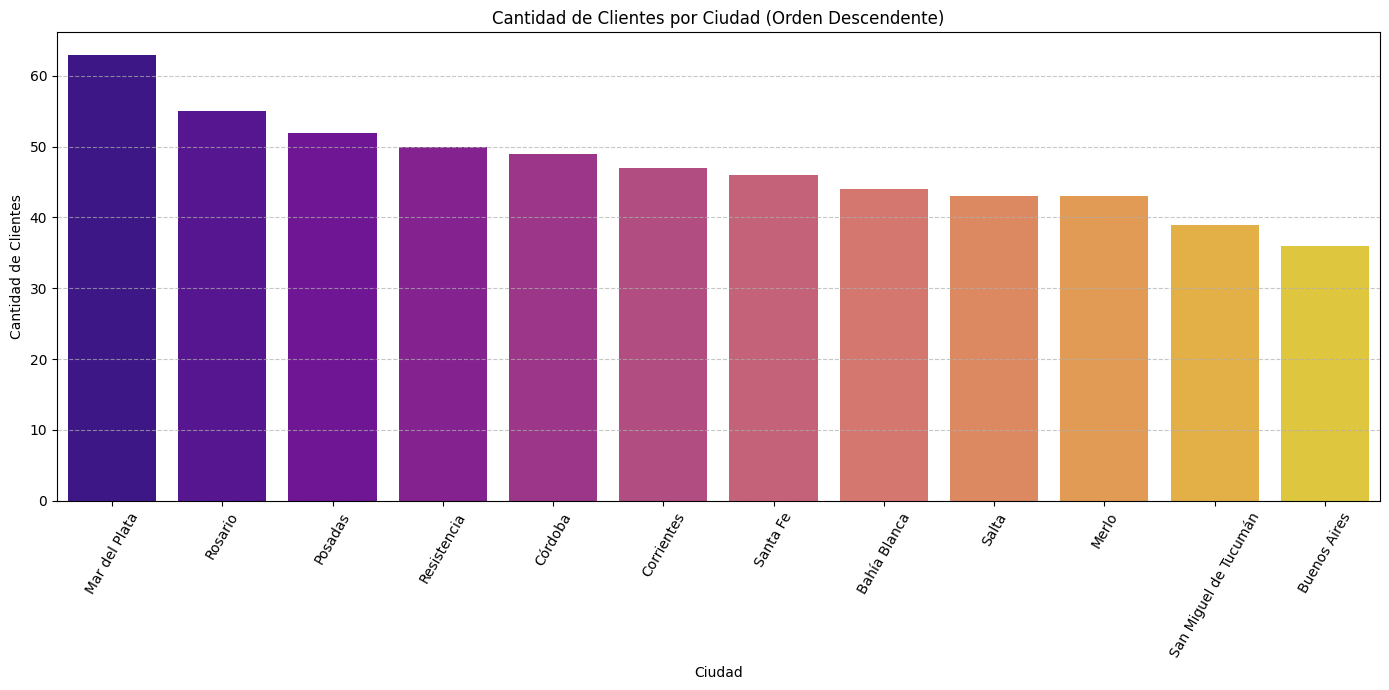

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar el DataFrame clientes_por_ciudad en orden descendente por cantidad_clientes
clientes_por_ciudad_sorted = clientes_por_ciudad.sort_values(by='cantidad_clientes', ascending=False)

# --- Gráfico de Cantidad de Clientes por Ciudad ---
plt.figure(figsize=(14, 7))
sns.barplot(x='ciudad', y='cantidad_clientes', data=clientes_por_ciudad_sorted, hue='ciudad', palette='plasma', legend=False)
plt.title('Cantidad de Clientes por Ciudad (Orden Descendente)')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=60) # Rotar etiquetas para evitar solapamiento
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La mayor cantidad de ventas provienen de lugares como Mar del Plata, Rosario y Posadas mientras que lugares como BsAs y San Miguel de Túcuman tienen los menores

In [ ]:
import plotly.express as px

# --- Gráfico de Dispersión: Edad vs. Ingresos ---
fig_edad_ingresos = px.scatter(
    clientes,
    x='edad',
    y='ingresos',
    hover_name='nombre',
    title='Edad de Clientes vs. Ingresos',
    labels={'edad': 'Edad', 'ingresos': 'Ingresos ($)'},
    color='ciudad', # Colorear por ciudad para añadir otra dimensión
)
fig_edad_ingresos.update_layout(xaxis_title='Edad', yaxis_title='Ingresos ($)')
fig_edad_ingresos.show()

# --- Box Plot: Ciudad vs. Ingresos ---
fig_ciudad_ingresos = px.box(
    clientes,
    x='ciudad',
    y='ingresos',
    title='Distribución de Ingresos por Ciudad',
    labels={'ciudad': 'Ciudad', 'ingresos': 'Ingresos ($)'},
    points='outliers' # Muestra los outliers
)
fig_ciudad_ingresos.update_layout(xaxis_title='Ciudad', yaxis_title='Ingresos ($)')
fig_ciudad_ingresos.show()

In [ ]:
import plotly.express as px

# Agrupar por edad y ciudad para calcular el ingreso promedio
clientes_promedio_edad_ciudad = clientes.groupby(['edad', 'ciudad'])['ingresos'].mean().reset_index()

# Crear el lineplot con Plotly Express
fig_line_edad_ingresos_ciudad = px.line(
    clientes_promedio_edad_ciudad,
    x='edad',
    y='ingresos',
    color='ciudad', # Una línea distinta por cada ciudad
    title='Ingreso Promedio por Edad y Ciudad',
    labels={'edad': 'Edad', 'ingresos': 'Ingreso Promedio ($)'},
    hover_data={'edad': True, 'ciudad': True, 'ingresos': ':.2f'}
)

fig_line_edad_ingresos_ciudad.update_layout(
    xaxis_title='Edad',
    yaxis_title='Ingreso Promedio ($)'
)

fig_line_edad_ingresos_ciudad.show()

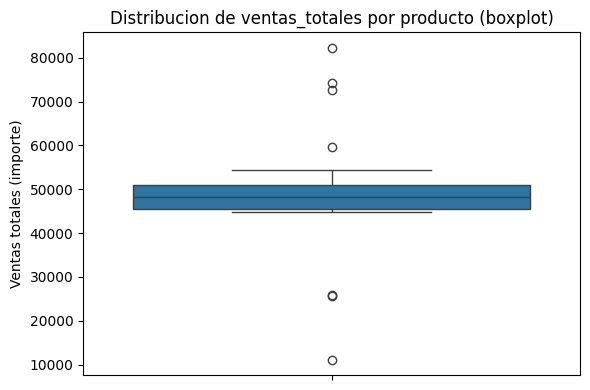

In [ ]:

plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df_final,
    y='ventas_total'
)

plt.title("Distribucion de ventas_totales por producto (boxplot)")
plt.ylabel("Ventas totales (importe)")
plt.tight_layout()
plt.show()

Boxplot denotando que la mayoria de las ventas por producto suceden entre los 50k con poco desvio, y solo algunos productos siendo outliers.


In [ ]:
import plotly.express as px

fig_roas_hist = px.histogram(
    df_final,
    x='ROAS',
    nbins=20,
    title='Distribución del ROAS por producto (interactivo)',
    labels={'ROAS': 'ROAS', 'count': 'Frecuencia'},
)

fig_roas_hist.update_layout(
    xaxis_title='ROAS',
    yaxis_title='Frecuencia'
)

# Mostrar el gráfico
fig_roas_hist.show()

#Datos sobre Clientes


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# --- Generar las figuras individuales con Plotly Express ---

# 1. Gráfico de Clientes por Ciudad (Bar Plot)
clientes_por_ciudad_sorted = clientes.groupby('ciudad').size().reset_index(name='cantidad_clientes').sort_values(by='cantidad_clientes', ascending=False)
fig_ciudad_bar_px = px.bar(clientes_por_ciudad_sorted,
                           x='ciudad',
                           y='cantidad_clientes',
                           title='Cantidad de Clientes por Ciudad')

# 2. Gráfico de Clientes por Edad (Bar Plot)
clientes_por_edad = clientes.groupby('edad').size().reset_index(name='cantidad_clientes')
fig_edad_bar_px = px.bar(clientes_por_edad,
                         x='edad',
                         y='cantidad_clientes',
                         title='Cantidad de Clientes por Edad')

# 3. Gráfico de Ingreso Promedio por Edad y Ciudad (Line Plot)
clientes_promedio_edad_ciudad = clientes.groupby(['edad', 'ciudad'])['ingresos'].mean().reset_index()
fig_promedio_line_px = px.line(clientes_promedio_edad_ciudad,
                               x='edad',
                               y='ingresos',
                               color='ciudad',
                               title='Ingreso Promedio por Edad y Ciudad',
                               labels={'edad': 'Edad', 'ingresos': 'Ingreso Promedio ($)'},
                               hover_data={'edad': True, 'ciudad': True, 'ingresos': ':.2f'})

# --- Crear el Subplot Dashboard ---
fig = make_subplots(
    rows=2,
    cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]], # La segunda fila, primera columna abarca 2 columnas, la segunda celda está vacía
    subplot_titles=("Cantidad de Clientes por Ciudad", "Cantidad de Clientes por Edad", "Ingreso Promedio por Edad y Ciudad")
)

# --- Añadir las trazas de cada figura al subplot principal ---

for trace in fig_ciudad_bar_px['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_edad_bar_px['data']:
    fig.add_trace(trace, row=1, col=2)

for trace in fig_promedio_line_px['data']:
    fig.add_trace(trace, row=2, col=1)

# --- Actualizar el diseño del dashboard ---
fig.update_layout(
    title_text="Dashboard de Análisis de Clientes",
    height=800,
    showlegend=True,
    hovermode="closest"
)

# Actualizar los títulos de los ejes para cada subplot
fig.update_xaxes(title_text="Ciudad", row=1, col=1)
fig.update_yaxes(title_text="Cantidad de Clientes", row=1, col=1)

fig.update_xaxes(title_text="Edad", row=1, col=2)
fig.update_yaxes(title_text="Cantidad de Clientes", row=1, col=2)

fig.update_xaxes(title_text="Edad", row=2, col=1)
fig.update_yaxes(title_text="Ingreso Promedio ($)", row=2, col=1)

fig.show()

 En el dashboard creado con los datos de los clientes podemos apreciar de vuelta la concentracion de clientes en un rango etario de entre 28 y 43 años, con la gran mayoria viniendo de ciudades como Rosario y Mar del Plata.

 Mientras que ciudades como Buenos Aires y Tucuman evidencian una gran caida, pero viendo por el gráfico inferior, esto se puede deber a que no tienen ingresos de clientes mayores a 55 años. Lo cual puede indicar una falta de estrategia  de marketing que aplique a estas edades en estas localidades.

#Datos de Ventas y Productos


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# --- 1. Ventas Totales por Mes (Line Plot) ---
if 'ventas_mes' not in locals() or ventas_mes.empty:
    ventas['anio_mes'] = ventas['fecha_venta'].dt.to_period('M').astype(str)
    ventas_mes = (
        ventas.groupby('anio_mes', as_index=False)
        .agg(ventas_totales=('importe', 'sum'))
    )

fig_ventas_mes_px = px.line(
    ventas_mes,
    x='anio_mes',
    y='ventas_totales',
    title='Ventas Totales por Mes',
    labels={'anio_mes': 'Año-Mes', 'ventas_totales': 'Ventas Totales ($)'},
    markers=True
)
fig_ventas_mes_px.update_layout(showlegend=False)

# --- 2. Ventas Totales por Producto (Bar Plot) ---
if 'prod_global' not in locals() or prod_global.empty:
    print("Error: 'prod_global' no está disponible. Por favor, ejecuta las celdas anteriores.")

prod_global_sorted_sales = prod_global.sort_values('ventas_total', ascending=False)
fig_ventas_producto_px = px.bar(
    prod_global_sorted_sales,
    x='producto',
    y='ventas_total',
    title='Ventas Totales por Producto',
    labels={'producto': 'Producto', 'ventas_total': 'Ventas Totales ($)'}
)
fig_ventas_producto_px.update_layout(xaxis={'categoryorder':'total descending'}, showlegend=False)

# --- 3. ROAS por Producto (Bar Plot) ---
prod_global_sorted_roas = prod_global.sort_values('ROAS', ascending=False)
fig_roas_producto_px = px.bar(
    prod_global_sorted_roas,
    x='producto',
    y='ROAS',
    title='ROAS por Producto',
    labels={'producto': 'Producto', 'ROAS': 'ROAS'}
)
fig_roas_producto_px.update_layout(xaxis={'categoryorder':'total descending'}, showlegend=False)

# --- 4. Boxplot de Ventas Totales ---
if 'df_final' not in locals() or df_final.empty:
    print("Error: 'df_final' no está disponible. Por favor, ejecuta las celdas anteriores.")

fig_boxplot = go.Figure(go.Box(y=df_final['ventas_total'], name='Ventas Totales'))
fig_boxplot.update_layout(title_text='Distribución de Ventas Totales por Producto')

# --- 5. Diagrama de Dispersión: Ventas Totales vs ROAS ---
fig_scatter_px = px.scatter(
    prod_global,
    x='ventas_total',
    y='ROAS',
    hover_name='producto',
    title='Diagrama de Dispersión: Ventas Totales vs ROAS',
    labels={'ventas_total': 'Ventas Totales ($)', 'ROAS': 'ROAS'},
    trendline='ols'
)
fig_scatter_px.update_layout(showlegend=False)

# --- Crear el Dashboard con Subplots ---
fig = make_subplots(
    rows=3,
    cols=2,
    specs=[[{}, {}],
           [{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=(
        'Ventas Totales por Mes',
        'Ventas Totales por Producto',
        'ROAS por Producto',
        'Distribución de Ventas Totales',
        'Diagrama de Dispersión: Ventas Totales vs ROAS'
    ),
    horizontal_spacing=0.15,
    vertical_spacing=0.24
)


for trace in fig_ventas_mes_px['data']:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_ventas_producto_px['data']:
    fig.add_trace(trace, row=1, col=2)
for trace in fig_roas_producto_px['data']:
    fig.add_trace(trace, row=2, col=1)
for trace in fig_boxplot['data']:
    fig.add_trace(trace, row=2, col=2)

for trace in fig_scatter_px['data']:
    fig.add_trace(trace, row=3, col=1)

# Actualizar los layouts de los subplots
fig.update_layout(
    title_text='Dashboard de Análisis de Ventas y Marketing',
    height=1200,
    showlegend=False,
    hovermode='x unified'
)

# Ajustar títulos de ejes
fig.update_xaxes(title_text='Año-Mes', row=1, col=1)
fig.update_yaxes(title_text='Ventas Totales ($)', row=1, col=1)

fig.update_xaxes(title_text='Producto', row=1, col=2)
fig.update_yaxes(title_text='Ventas Totales ($)', row=1, col=2)

fig.update_xaxes(title_text='Producto', row=2, col=1)
fig.update_yaxes(title_text='ROAS', row=2, col=1)

fig.update_xaxes(title_text='Ventas Totales', row=2, col=2, showticklabels=False)
fig.update_yaxes(title_text='Ventas Totales ($)', row=2, col=2)

# Ajustar títulos de ejes para el nuevo gráfico en la tercera fila
fig.update_xaxes(title_text='Ventas Totales ($)', row=3, col=1)
fig.update_yaxes(title_text='ROAS', row=3, col=1)

fig.show()

En los gráficos de las ventas podemos obtener muchas conclusiones:

1- Grafico Ventas vs Mes: Los meses con mayores ventas fueron en el primer semestre del año, particularmente Marzo y Mayo, y la segunda mitad tiene una caida notable de 25% y no remonta mucho hasta el final del año.

2- Importe vs Productos: Podemos notar que la mayoria de los productos rondan los 55k en ventas con algunos Outliers como Lamparas de Mesa, Auriculares y Microondas siendo las mayores fuentes de ingresos y los Candelabros siendo una de las menores


4- Distribución de ventas totales: Nos indica la misma tendencia de que la mayoria de los productos venden generan alrededor de 55k en importe con solo algunos outliers.

3 y 5- ROAS vs Productos: Unos gráficos que indican una tendencia similar en los anteriores graficos, y nos indican que haber invertido en productos como Lamparas de Mesa, Auriculares y Microondas ha generado un retorno de inversión muy superior. Mientras que Productos como Calendabros no han generado tales resultados asique se podria invertir menos en su publicidad.